In [40]:
import pandas as pd 

In [35]:
top_10_Sender = pd.read_csv('C:\\Users\\ce1059\\Vmware\\enron_cleaned_sent_emails.csv', error_bad_lines=False)

In [36]:
top_10_Sender.head()

,file,body
0,allen-p/_sent_mail/1.,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Let's shoot for Tuesday at 11:45.


In [63]:
top_10_Sender['Name'] = top_10_Sender['file'].str.split("/",n=1,expand=True)[0]
top_10_Sender.head()

,file,body,Name
0,allen-p/_sent_mail/1.,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Let's shoot for Tuesday at 11:45.,allen-p


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

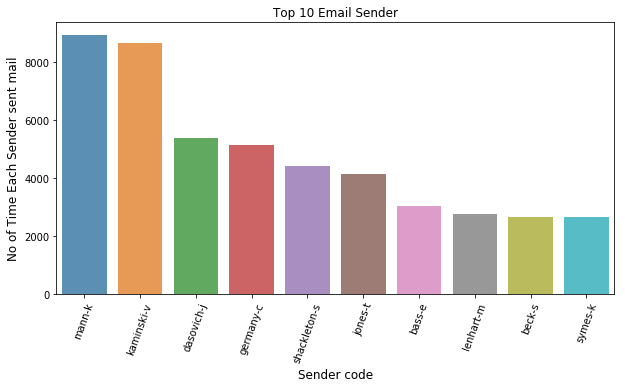

In [65]:
sender_count = top_10_Sender['Name'].value_counts()
sender_count = sender_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(sender_count.index , sender_count.values, alpha = 0.8)
plt.title("Top 10 Email Sender")
plt.ylabel('No of Time Each Sender sent mail', fontsize = 12)
plt.xlabel('Sender code', fontsize = 12)
plt.xticks(rotation=70)
plt.show()

In [6]:
import pandas as pd

email = pd.read_csv('C:\\Users\\ce1059\\Vmware\\enron_cleaned_sent_emails.csv', error_bad_lines=False)
email_data = email[['body']]
email_data ['index'] = email_data.index
documents = email_data 

In [7]:
print(len(documents))
print(documents[:5])

126846
                                                body  index
0                          Here is our forecast\n\n       0
1  Traveling to have a business meeting takes the...      1
2                     test successful.  way to go!!!      2
3  Randy,\n\n Can you send me a schedule of the s...      3
4                Let's shoot for Tuesday at 11:45.        4


In [8]:
print(documents.shape)
documents = documents.dropna()
documents.count()

(126846, 2)


body     126846
index    126846
dtype: int64

In [9]:
#Basic Data Cleaning 
###Convert to Lower Case
documents['body']= documents['body'].apply(lambda body: body.strip().lower())
documents.head()

,body,index
0,here is our forecast,0
1,traveling to have a business meeting takes the...,1
2,test successful. way to go!!!,2
3,"randy,\n\n can you send me a schedule of the s...",3
4,let's shoot for tuesday at 11:45.,4


In [10]:
#Removing URLs
documents['body'] = documents['body'].str.replace('http\S+|www.\S+', 'URL', case=False)

In [11]:
#Remove special character, Punctuations and numbers
documents['body'] = documents['body'].str.replace("[^a-zA-Z#]", " ")
documents.head()

,body,index
0,here is our forecast,0
1,traveling to have a business meeting takes the...,1
2,test successful way to go,2
3,randy can you send me a schedule of the sal...,3
4,let s shoot for tuesday at,4


In [12]:
#Loading gensim and nltk libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')


C:\Users\ce1059\Python\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ce1059\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
stemmer = SnowballStemmer('english')

In [9]:
##Words reduced to the original word
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


#Remove more than two space with one space
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [10]:
doc_sample = documents[documents['index'] == 10000].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['sounds', 'good', 'to', 'me', '', '', 'it', 'leaves', 'us', 'some', 'flexibility', '', '', 'thanks', '', 'lynn', '', '', '', '', '', '', 'original', 'message', '', '', '', '', '', 'from', '', 'holmes', '', 'bradley', '', 'sent', '', 'friday', '', 'september', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'am', 'to', '', 'blair', '', 'lynn', '', 'medeles', '', 'gerry', 'subject', '', 'fw', '', 'nng', 'letter', 'asking', 'for', 'written', 'clarifications', '', '', 'i', 'recommend', 'this', 'wording', '', '', '', '', 'ets', 'is', 'in', 'the', 'process', 'of', 'evaluating', 'the', 'feedback', 'and', 'system', 'requests', 'from', 'the', 'nng', 'winter', 'operations', 'meeting', '', '', 'a', 'system', 'enhancement', 'to', 'notify', 'shippers', 'when', 'they', 'have', 'nominated', 'to', 'an', 'alternate', 'receipt', 'or', 'delivery', 'point', 'that', 'is', 'not', 'on', 'their', 'contract', 'is', 'on', 'the', 'list', 'for', 'consideration', '', '', 'the', 'requir

In [11]:
processed_docs = documents['body'].map(preprocess)

In [12]:
processed_docs.head(20)

0                                            [forecast]
1     [travel, busi, meet, take, trip, especi, prepa...
2                                       [test, success]
3     [randi, send, schedul, salari, level, schedul,...
4                                      [shoot, tuesday]
5                    [greg, tuesday, thursday, phillip]
6     [follow, distribut, list, updat, phillip, alle...
7                                                [morn]
8     [login, pallen, davi, think, requir, static, a...
9     [forward, phillip, allen, buckner, buck, buck,...
10    [buckner, deliv, diego, enron, energi, servic,...
11    [luci, rentrol, open, save, rentrol, folder, f...
12    [forward, phillip, allen, richard, burchfield,...
13    [forward, phillip, allen, richard, burchfield,...
14    [dave, name, west, desk, member, categori, ori...
15                      [paula, million, fine, phillip]
16    [forward, phillip, allen, enron, north, americ...
17    [mike, grigsbi, have, problem, access, wes

In [13]:
#Bag of Words (Top 10 words)
top_10_words = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in top_10_words.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 forecast
1 austin
2 better
3 boat
4 busi
5 desir
6 differ
7 discuss
8 especi
9 fli
10 formal


In [22]:
#keep only the first 100000 most frequent tokens
top_10_words.filter_extremes(no_below=8, no_above=0.5, keep_n=100000)

In [23]:
bow_corpus = [top_10_words.doc2bow(doc) for doc in processed_docs]
bow_corpus[10000]

[(7, 1),
 (16, 1),
 (51, 3),
 (54, 1),
 (55, 3),
 (57, 1),
 (69, 1),
 (74, 1),
 (76, 1),
 (82, 1),
 (107, 1),
 (111, 1),
 (118, 1),
 (135, 1),
 (146, 3),
 (164, 2),
 (170, 2),
 (215, 1),
 (223, 1),
 (233, 1),
 (244, 1),
 (252, 2),
 (257, 1),
 (268, 1),
 (279, 1),
 (281, 1),
 (296, 1),
 (351, 3),
 (411, 1),
 (412, 2),
 (460, 1),
 (485, 2),
 (540, 1),
 (557, 1),
 (566, 1),
 (586, 1),
 (596, 1),
 (625, 4),
 (659, 1),
 (784, 1),
 (797, 2),
 (840, 1),
 (931, 4),
 (970, 4),
 (1015, 4),
 (1024, 1),
 (1066, 2),
 (1129, 1),
 (1240, 1),
 (1324, 2),
 (1340, 1),
 (1345, 1),
 (1416, 1),
 (1418, 1),
 (1470, 1),
 (1497, 1),
 (1568, 1),
 (1632, 1),
 (1668, 2),
 (1714, 1),
 (1772, 3),
 (1780, 1),
 (1865, 1),
 (1876, 1),
 (1890, 1),
 (1897, 2),
 (1997, 1),
 (2033, 3),
 (2097, 4),
 (2129, 1),
 (2145, 1),
 (2261, 2),
 (2506, 1),
 (2509, 1),
 (2701, 1),
 (2715, 1),
 (3051, 1),
 (3243, 1),
 (3761, 1),
 (3957, 1),
 (4170, 1),
 (4351, 1),
 (4536, 1),
 (4797, 1),
 (5187, 2),
 (5336, 1),
 (5866, 1),
 (6954, 1),

In [24]:
#Analyse the corpus
bow_doc_10000 = bow_corpus[10000]
for i in range(len(bow_doc_10000)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_10000[i][0], 
                                               top_10_words[bow_doc_10000[i][0]], 
bow_doc_10000[i][1]))

Word 7 ("discuss") appears 1 time.
Word 16 ("meet") appears 1 time.
Word 51 ("send") appears 3 time.
Word 54 ("tuesday") appears 1 time.
Word 55 ("greg") appears 3 time.
Word 57 ("allen") appears 1 time.
Word 69 ("list") appears 1 time.
Word 74 ("thank") appears 1 time.
Word 76 ("morn") appears 1 time.
Word 82 ("requir") appears 1 time.
Word 107 ("energi") appears 1 time.
Word 111 ("floor") appears 1 time.
Word 118 ("instal") appears 1 time.
Word 135 ("power") appears 1 time.
Word 146 ("septemb") appears 3 time.
Word 164 ("request") appears 2 time.
Word 170 ("file") appears 2 time.
Word 215 ("current") appears 1 time.
Word 223 ("determin") appears 1 time.
Word 233 ("exact") appears 1 time.
Word 244 ("flexibl") appears 1 time.
Word 252 ("good") appears 2 time.
Word 257 ("hope") appears 1 time.
Word 268 ("inform") appears 1 time.
Word 279 ("leav") appears 1 time.
Word 281 ("market") appears 1 time.
Word 296 ("point") appears 1 time.
Word 351 ("origin") appears 3 time.
Word 411 ("georg") 

In [21]:
#Creating TF-IDF model
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


In [25]:
#Running LDA using Bag of Words
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=top_10_words, passes=2, workers=2)

In [26]:
#For each topic, we will explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.020*"sara" + 0.020*"agreement" + 0.019*"thank" + 0.015*"deal" + 0.015*"shackleton" + 0.014*"forward" + 0.013*"corp" + 0.011*"attach" + 0.011*"chang" + 0.011*"need"
Topic: 1 
Words: 0.016*"price" + 0.013*"power" + 0.012*"deal" + 0.012*"energi" + 0.009*"market" + 0.009*"contract" + 0.006*"state" + 0.006*"term" + 0.006*"month" + 0.006*"california"
Topic: 2 
Words: 0.022*"corp" + 0.019*"develop" + 0.016*"enronxg" + 0.012*"mark" + 0.010*"john" + 0.009*"forward" + 0.008*"kate" + 0.008*"syme" + 0.008*"david" + 0.007*"communic"
Topic: 3 
Words: 0.017*"omni" + 0.012*"busi" + 0.010*"market" + 0.009*"manag" + 0.009*"trade" + 0.008*"compani" + 0.007*"group" + 0.006*"develop" + 0.006*"risk" + 0.006*"issu"
Topic: 4 
Words: 0.055*"mail" + 0.017*"hotmail" + 0.015*"yahoo" + 0.011*"matthew" + 0.010*"lenhart" + 0.007*"mailto" + 0.007*"love" + 0.005*"http" + 0.005*"dinner" + 0.005*"night"
Topic: 5 
Words: 0.048*"messag" + 0.027*"mail" + 0.027*"intend" + 0.026*"send" + 0.024*"recipi" + 0

In [27]:
#Running LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=top_10_words, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.014*"syme" + 0.012*"vinc" + 0.010*"kate" + 0.007*"kaminski" + 0.005*"manag" + 0.003*"present" + 0.003*"thank" + 0.003*"meet" + 0.003*"mike" + 0.003*"group"
Topic: 1 Word: 0.006*"agreement" + 0.003*"attach" + 0.003*"contract" + 0.003*"draft" + 0.003*"mann" + 0.003*"chang" + 0.003*"letter" + 0.003*"power" + 0.003*"energi" + 0.003*"need"
Topic: 2 Word: 0.017*"sara" + 0.015*"shackleton" + 0.008*"corp" + 0.008*"develop" + 0.007*"enronxg" + 0.006*"meet" + 0.006*"mark" + 0.004*"taylor" + 0.004*"communic" + 0.004*"john"
Topic: 3 Word: 0.022*"blackberri" + 0.012*"wireless" + 0.012*"handheld" + 0.010*"http" + 0.009*"test" + 0.008*"cason" + 0.008*"sharen" + 0.007*"yahoo" + 0.006*"send" + 0.004*"html"
Topic: 4 Word: 0.009*"go" + 0.007*"good" + 0.007*"thank" + 0.006*"think" + 0.006*"know" + 0.005*"weekend" + 0.005*"night" + 0.005*"hope" + 0.005*"work" + 0.005*"time"
Topic: 5 Word: 0.011*"clair" + 0.011*"carol" + 0.007*"attach" + 0.005*"elizabeth" + 0.005*"susan" + 0.005*"jeff" + 0.

In [28]:
processed_docs[10000]

['sound',
 'good',
 'leav',
 'flexibl',
 'thank',
 'lynn',
 'origin',
 'messag',
 'holm',
 'bradley',
 'send',
 'friday',
 'septemb',
 'blair',
 'lynn',
 'medel',
 'gerri',
 'subject',
 'letter',
 'ask',
 'write',
 'clarif',
 'recommend',
 'word',
 'process',
 'evalu',
 'feedback',
 'request',
 'winter',
 'oper',
 'meet',
 'enhanc',
 'notifi',
 'shipper',
 'nomin',
 'altern',
 'receipt',
 'deliveri',
 'point',
 'contract',
 'list',
 'consider',
 'requir',
 'modif',
 'current',
 'determin',
 'exact',
 'method',
 'word',
 'messag',
 'final',
 'anticip',
 'enhanc',
 'instal',
 'quarter',
 'comment',
 'origin',
 'messag',
 'mercaldo',
 'vernon',
 'send',
 'friday',
 'septemb',
 'blair',
 'lynn',
 'holm',
 'bradley',
 'subject',
 'letter',
 'ask',
 'write',
 'clarif',
 'origin',
 'messag',
 'greg',
 'hathaway',
 'mailto',
 'greg',
 'hathaway',
 'send',
 'tuesday',
 'septemb',
 'william',
 'miller',
 'kent',
 'mercaldo',
 'vernon',
 'gregg',
 'tyson',
 'hillari',
 'dryselius',
 'jason',
 'le

In [29]:
#Performance evaluation by classifying sample document using LDA Bag of Words model
for index, score in sorted(lda_model[bow_corpus[10000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.2893710136413574	 
Topic: 0.022*"corp" + 0.019*"develop" + 0.016*"enronxg" + 0.012*"mark" + 0.010*"john" + 0.009*"forward" + 0.008*"kate" + 0.008*"syme" + 0.008*"david" + 0.007*"communic"

Score: 0.23253817856311798	 
Topic: 0.048*"send" + 0.042*"messag" + 0.042*"origin" + 0.027*"thank" + 0.017*"know" + 0.013*"monday" + 0.012*"octob" + 0.012*"meet" + 0.012*"tuesday" + 0.011*"friday"

Score: 0.21192315220832825	 
Topic: 0.016*"price" + 0.013*"power" + 0.012*"deal" + 0.012*"energi" + 0.009*"market" + 0.009*"contract" + 0.006*"state" + 0.006*"term" + 0.006*"month" + 0.006*"california"

Score: 0.08872057497501373	 
Topic: 0.020*"sara" + 0.020*"agreement" + 0.019*"thank" + 0.015*"deal" + 0.015*"shackleton" + 0.014*"forward" + 0.013*"corp" + 0.011*"attach" + 0.011*"chang" + 0.011*"need"

Score: 0.07856462150812149	 
Topic: 0.017*"omni" + 0.012*"busi" + 0.010*"market" + 0.009*"manag" + 0.009*"trade" + 0.008*"compani" + 0.007*"group" + 0.006*"develop" + 0.006*"risk" + 0.006*"issu"

S

In [30]:
#Performance evaluation by classifying sample document using LDA TF-IDF model
for index, score in sorted(lda_model_tfidf[bow_corpus[10000]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.4517238438129425	 
Topic: 0.006*"agreement" + 0.003*"attach" + 0.003*"contract" + 0.003*"draft" + 0.003*"mann" + 0.003*"chang" + 0.003*"letter" + 0.003*"power" + 0.003*"energi" + 0.003*"need"

Score: 0.22691656649112701	 
Topic: 0.005*"enov" + 0.004*"duke" + 0.004*"mail" + 0.004*"shari" + 0.004*"hyvl" + 0.004*"fossum" + 0.003*"draw" + 0.003*"paulhast" + 0.003*"northwestern" + 0.003*"vepco"

Score: 0.15909500420093536	 
Topic: 0.011*"clair" + 0.011*"carol" + 0.007*"attach" + 0.005*"elizabeth" + 0.005*"susan" + 0.005*"jeff" + 0.005*"send" + 0.005*"steff" + 0.004*"richard" + 0.004*"watson"

Score: 0.15806758403778076	 
Topic: 0.014*"syme" + 0.012*"vinc" + 0.010*"kate" + 0.007*"kaminski" + 0.005*"manag" + 0.003*"present" + 0.003*"thank" + 0.003*"meet" + 0.003*"mike" + 0.003*"group"


In [31]:
#Testing model on unseen document
test_document = 'Meeting at 10:30'
bow_vector = top_10_words.doc2bow(preprocess(test_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.5499658584594727	 Topic: 0.048*"send" + 0.042*"messag" + 0.042*"origin" + 0.027*"thank" + 0.017*"know"
Score: 0.05001053586602211	 Topic: 0.015*"vinc" + 0.012*"forward" + 0.011*"access" + 0.010*"kaminski" + 0.010*"request"
Score: 0.05001039430499077	 Topic: 0.017*"omni" + 0.012*"busi" + 0.010*"market" + 0.009*"manag" + 0.009*"trade"
Score: 0.05000925064086914	 Topic: 0.022*"corp" + 0.019*"develop" + 0.016*"enronxg" + 0.012*"mark" + 0.010*"john"
Score: 0.050001129508018494	 Topic: 0.015*"go" + 0.015*"think" + 0.013*"know" + 0.011*"time" + 0.011*"like"
Score: 0.05000096559524536	 Topic: 0.055*"mail" + 0.017*"hotmail" + 0.015*"yahoo" + 0.011*"matthew" + 0.010*"lenhart"
Score: 0.05000091716647148	 Topic: 0.020*"sara" + 0.020*"agreement" + 0.019*"thank" + 0.015*"deal" + 0.015*"shackleton"
Score: 0.0500003956258297	 Topic: 0.016*"price" + 0.013*"power" + 0.012*"deal" + 0.012*"energi" + 0.009*"market"
Score: 0.05000029876828194	 Topic: 0.019*"http" + 0.008*"energi" + 0.008*"compani" 

In [36]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [40]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ce1059\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


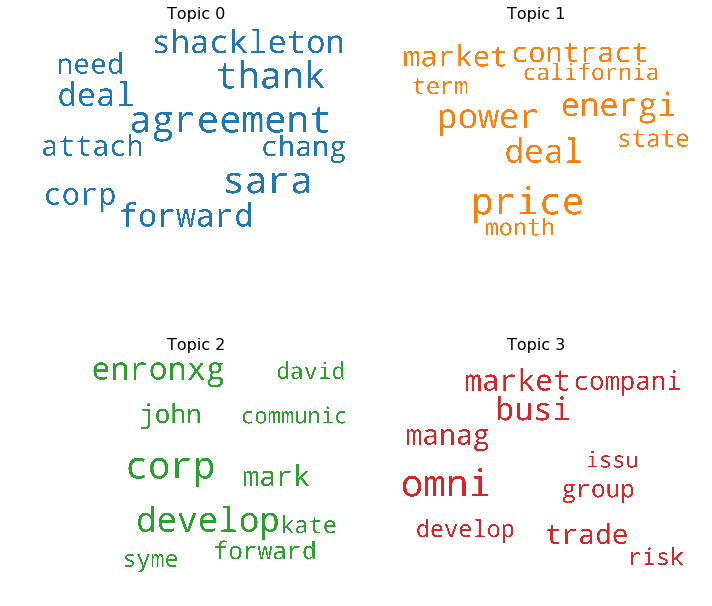

In [41]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [42]:
from collections import Counter

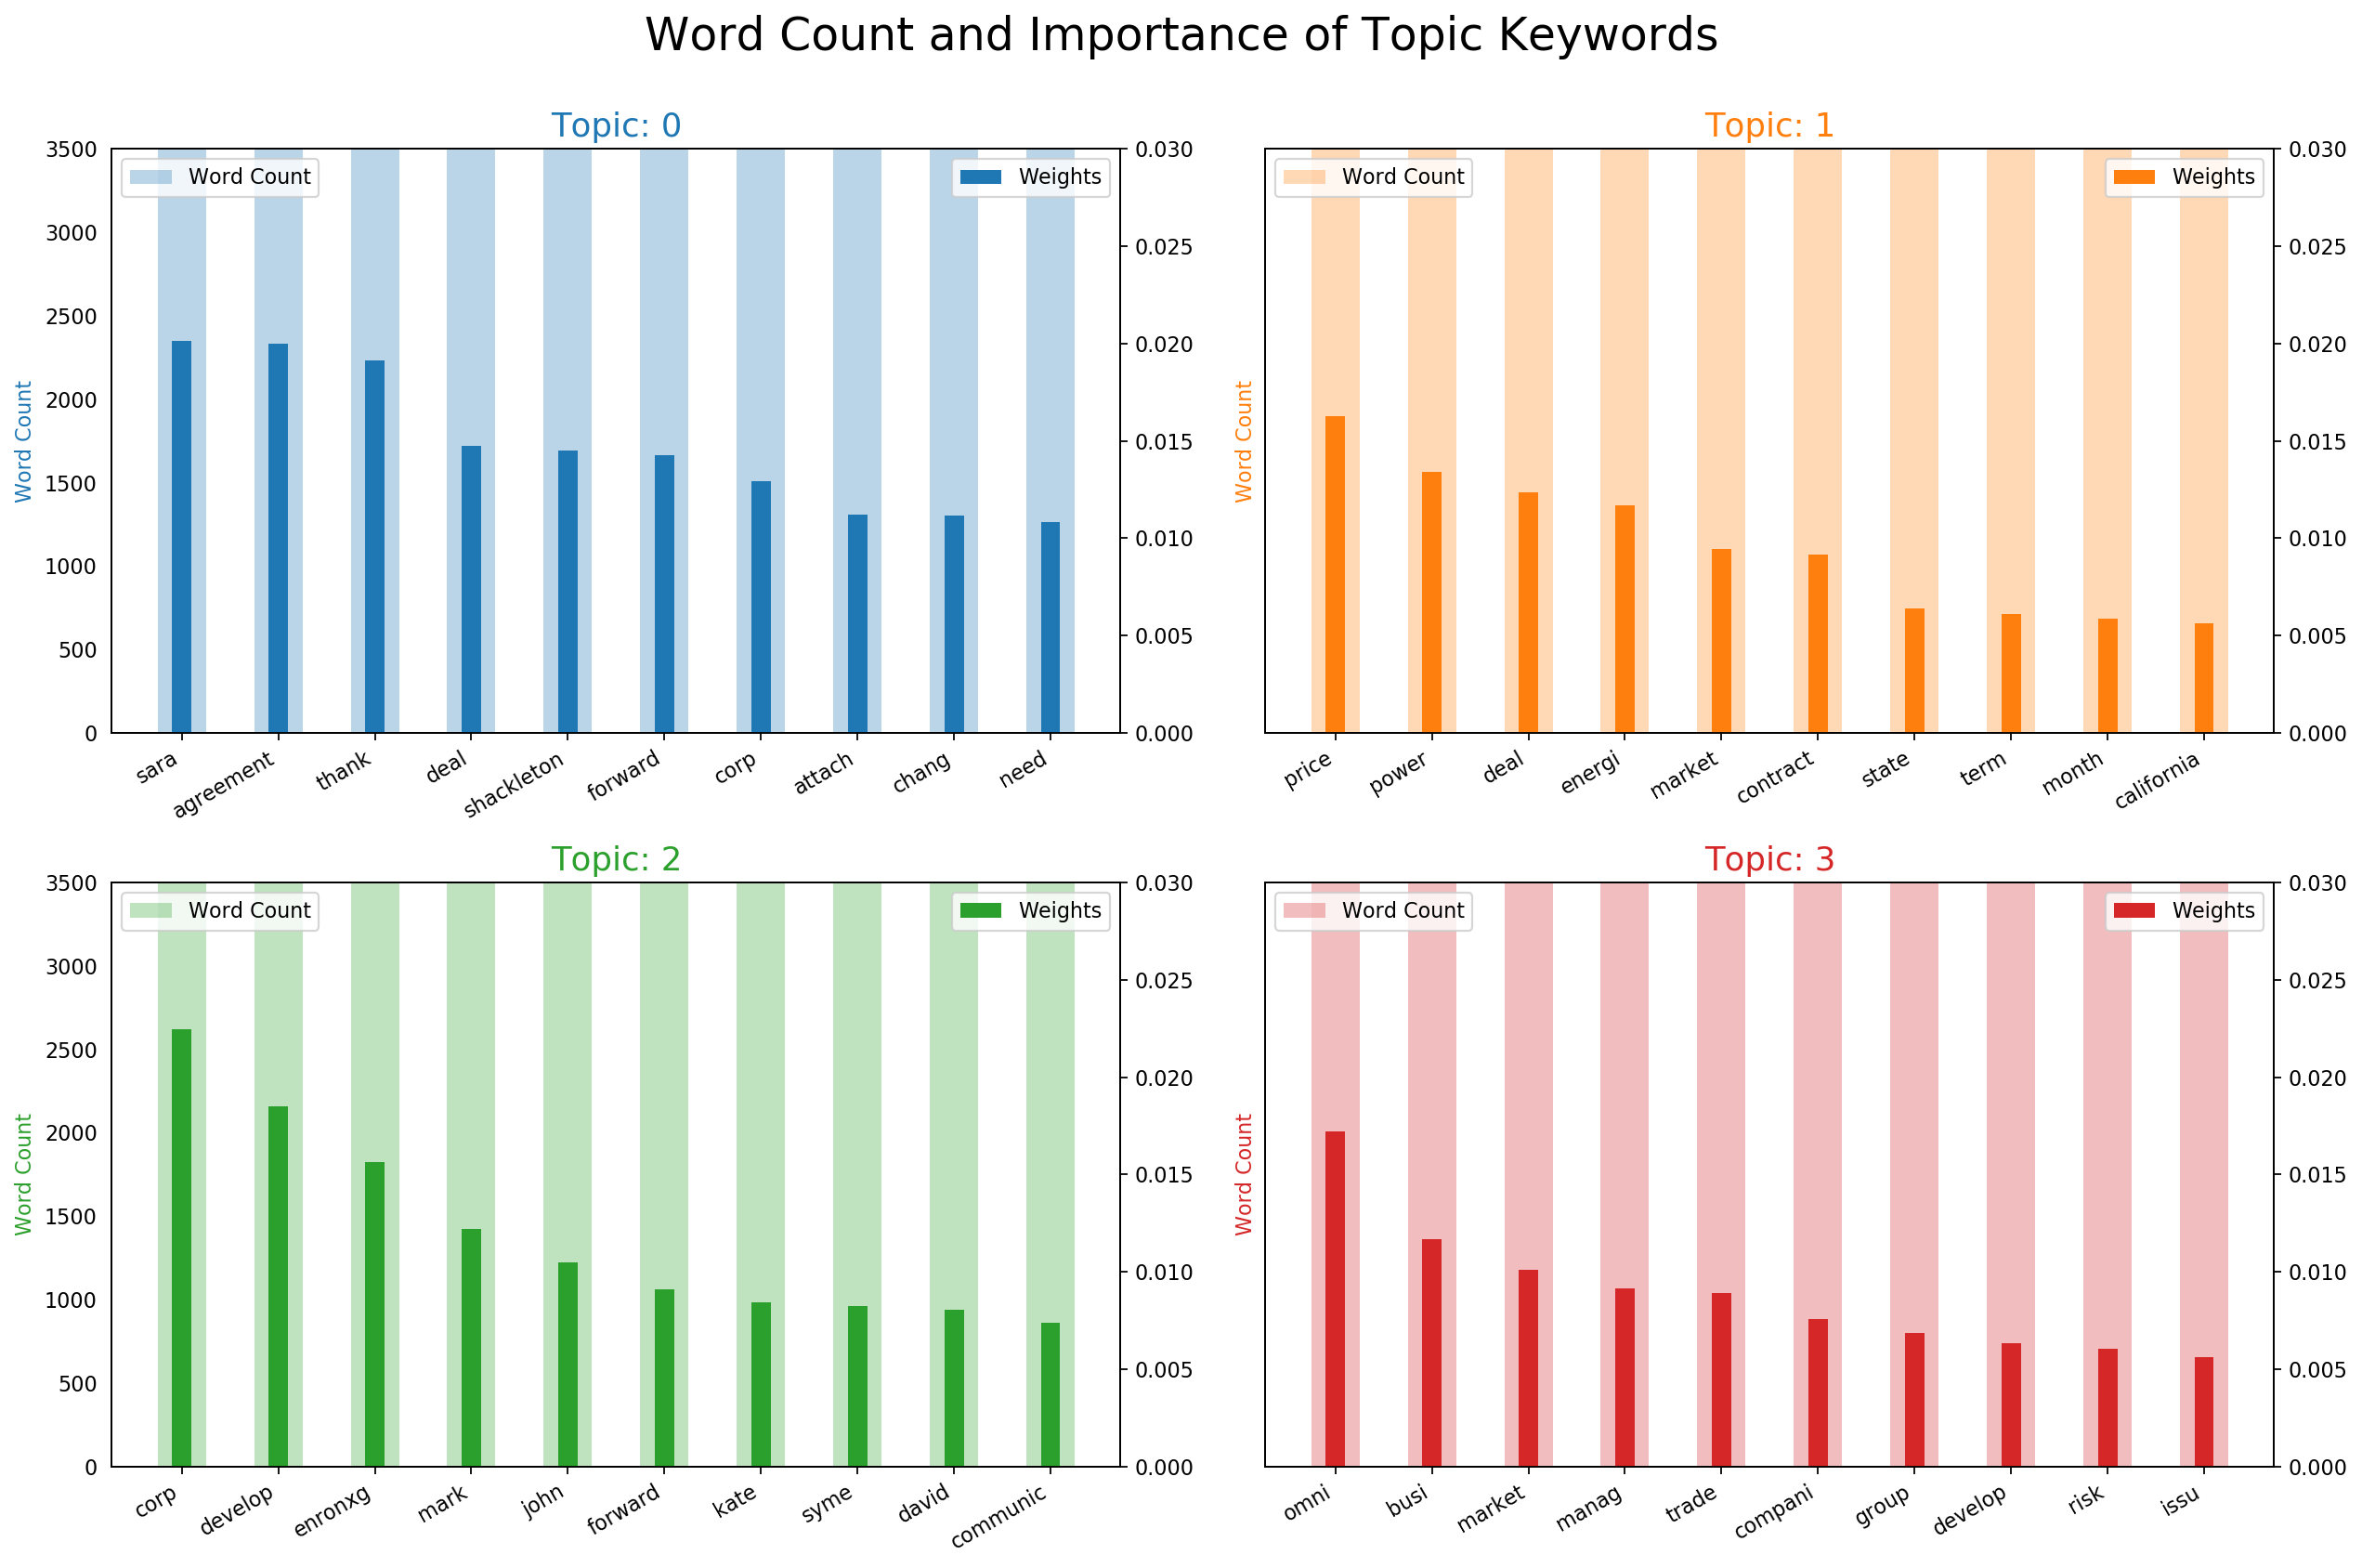

In [45]:
topics_info = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in processed_docs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics_info:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()